In [5]:
data = pd.read_csv("ai4i2020.csv")
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load and preprocess the data
data = pd.read_csv("ai4i2020.csv")

# Step 2: Define the target variable
# Combine the binary failure mode variables into a single multiclass target variable
data['Failure_type'] = data.apply(lambda row: 'No Failure' if row['Machine failure'] == 0 else
                                   'TWF' if row['TWF'] == 1 else
                                   'HDF' if row['HDF'] == 1 else
                                   'PWF' if row['PWF'] == 1 else
                                   'OSF' if row['OSF'] == 1 else
                                   'RNF', axis=1)

# Step 3: Drop non-numeric columns if not relevant
data.drop(columns=['Product ID', 'Type'], inplace=True)

# Step 4: Split the data into training and testing sets
X = data.drop(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Failure_type'], axis=1)
y = data['Failure_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Choose a model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

         HDF       0.81      0.76      0.79        17
  No Failure       0.99      1.00      0.99      1939
         OSF       0.71      0.38      0.50        13
         PWF       0.76      0.72      0.74        18
         RNF       0.00      0.00      0.00         2
         TWF       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.55      0.48      0.50      2000
weighted avg       0.97      0.98      0.98      2000



/Users/harikhumarprabhakaran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harikhumarprabhakaran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harikhumarprabhakaran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

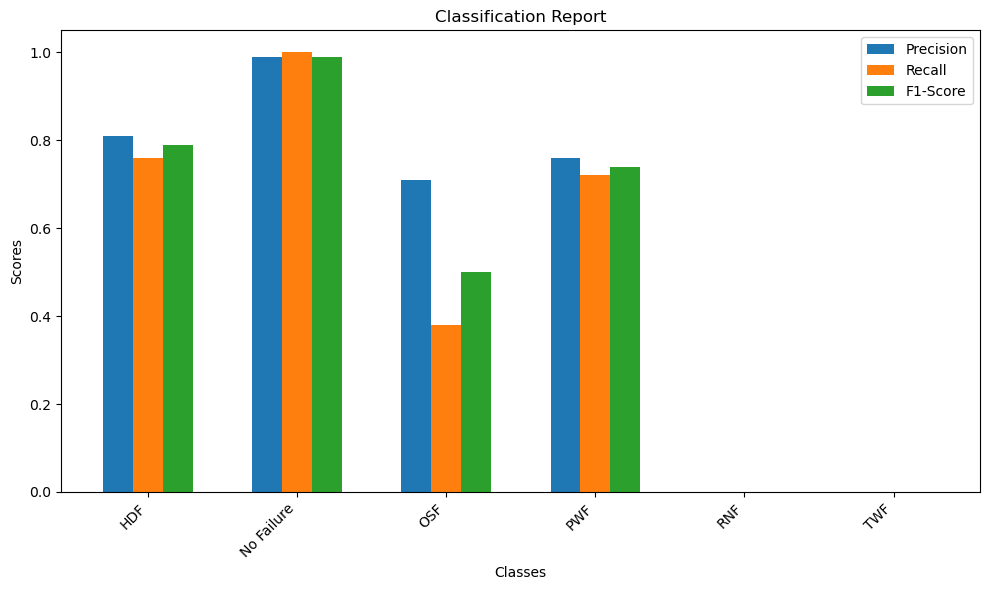

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Classification report values
classes = ['HDF', 'No Failure', 'OSF', 'PWF', 'RNF', 'TWF']
precision = [0.81, 0.99, 0.71, 0.76, 0.00, 0.00]
recall = [0.76, 1.00, 0.38, 0.72, 0.00, 0.00]
f1_score = [0.79, 0.99, 0.50, 0.74, 0.00, 0.00]

# Plotting
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [18]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Step 1: Load and preprocess the data
data = pd.read_csv("ai4i2020.csv")

# Step 2: Define the target variable
# Combine the binary failure mode variables into a single multiclass target variable
data['Failure_type'] = data.apply(lambda row: 'No Failure' if row['Machine failure'] == 0 else
                                   'TWF' if row['TWF'] == 1 else
                                   'HDF' if row['HDF'] == 1 else
                                   'PWF' if row['PWF'] == 1 else
                                   'OSF' if row['OSF'] == 1 else
                                   'RNF', axis=1)

# Step 3: Drop non-numeric columns if not relevant
data.drop(columns=['Product ID', 'Type'], inplace=True)

# Step 4: Encode the target variable into integer labels
label_encoder = LabelEncoder()
data['Failure_type_encoded'] = label_encoder.fit_transform(data['Failure_type'])

# Step 5: Split the data into training and testing sets
X = data.drop(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Failure_type', 'Failure_type_encoded'], axis=1)
y = data['Failure_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Rename columns to ensure they only contain alphanumeric characters and underscores
X_train.columns = ['col_' + str(i) for i in range(len(X_train.columns))]
X_test.columns = ['col_' + str(i) for i in range(len(X_test.columns))]

# Step 7: Choose a model (XGBoost Classifier)
xgb_model = XGBClassifier(random_state=42)

# Step 8: Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Step 9: Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.99      0.99      0.99      1939
           2       0.70      0.54      0.61        13
           3       0.76      0.72      0.74        18
           4       0.00      0.00      0.00         2
           5       0.33      0.09      0.14        11

    accuracy                           0.98      2000
   macro avg       0.61      0.56      0.57      2000
weighted avg       0.98      0.98      0.98      2000



/Users/harikhumarprabhakaran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harikhumarprabhakaran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harikhumarprabhakaran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

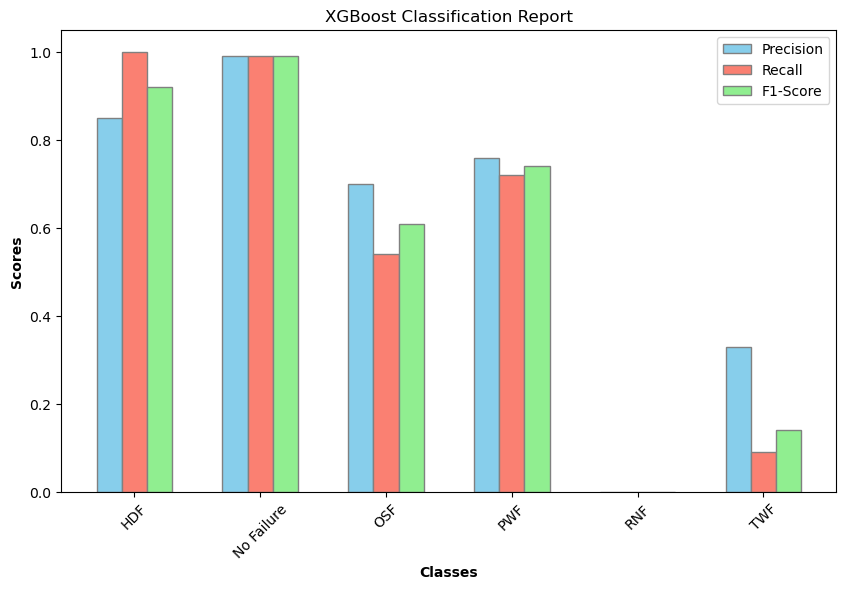

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Classification report values
class_names = ['HDF', 'No Failure', 'OSF', 'PWF', 'RNF', 'TWF']
precision = [0.85, 0.99, 0.70, 0.76, 0.00, 0.33]
recall = [1.00, 0.99, 0.54, 0.72, 0.00, 0.09]
f1_score = [0.92, 0.99, 0.61, 0.74, 0.00, 0.14]

# Set width of bar
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(class_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, precision, color='skyblue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='salmon', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='lightgreen', width=bar_width, edgecolor='grey', label='F1-Score')

# Add xticks on the middle of the group bars
plt.xlabel('Classes', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(class_names))], class_names, rotation=45)

# Add ylabel
plt.ylabel('Scores', fontweight='bold')

# Add title
plt.title('XGBoost Classification Report')

# Create legend & Show graphic
plt.legend()
plt.show()


In [22]:
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load and preprocess the data
data = pd.read_csv("ai4i2020.csv")

# Step 2: Define the target variable
# Combine the binary failure mode variables into a single multiclass target variable
data['Failure_type'] = data.apply(lambda row: 'No Failure' if row['Machine failure'] == 0 else
                                   'TWF' if row['TWF'] == 1 else
                                   'HDF' if row['HDF'] == 1 else
                                   'PWF' if row['PWF'] == 1 else
                                   'OSF' if row['OSF'] == 1 else
                                   'RNF', axis=1)

# Step 3: Drop non-numeric columns if not relevant
data.drop(columns=['Product ID', 'Type'], inplace=True)

# Step 4: Split the data into training and testing sets
X = data.drop(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Failure_type'], axis=1)
y = data['Failure_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Choose a model (K-Nearest Neighbors Classifier)
knn_model = KNeighborsClassifier()

# Step 6: Train the K-Nearest Neighbors model
knn_model.fit(X_train, y_train)

# Step 7: Evaluate the K-Nearest Neighbors model
y_pred_knn = knn_model.predict(X_test)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

         HDF       0.65      0.65      0.65        17
  No Failure       0.98      1.00      0.99      1939
         OSF       0.00      0.00      0.00        13
         PWF       0.67      0.11      0.19        18
         RNF       0.00      0.00      0.00         2
         TWF       0.00      0.00      0.00        11

    accuracy                           0.97      2000
   macro avg       0.38      0.29      0.30      2000
weighted avg       0.96      0.97      0.96      2000



/Users/harikhumarprabhakaran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harikhumarprabhakaran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harikhumarprabhakaran/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

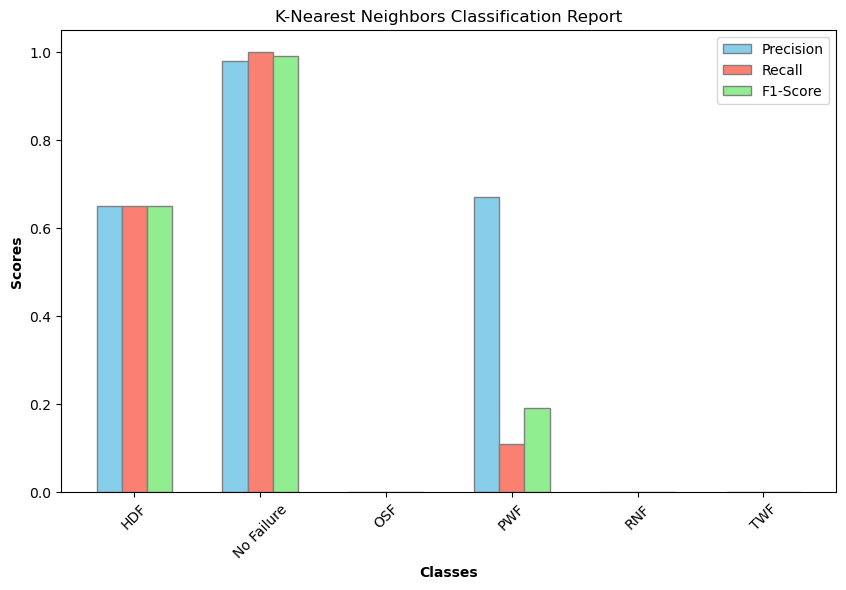

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Classification report values
class_names = ['HDF', 'No Failure', 'OSF', 'PWF', 'RNF', 'TWF']
precision = [0.65, 0.98, 0.00, 0.67, 0.00, 0.00]
recall = [0.65, 1.00, 0.00, 0.11, 0.00, 0.00]
f1_score = [0.65, 0.99, 0.00, 0.19, 0.00, 0.00]

# Set width of bar
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(class_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, precision, color='skyblue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='salmon', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='lightgreen', width=bar_width, edgecolor='grey', label='F1-Score')

# Add xticks on the middle of the group bars
plt.xlabel('Classes', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(class_names))], class_names, rotation=45)

# Add ylabel
plt.ylabel('Scores', fontweight='bold')

# Add title
plt.title('K-Nearest Neighbors Classification Report')

# Create legend & Show graphic
plt.legend()
plt.show()
